IMPORT IMPORTANT LIBRARIES:- 

These libraries are essential to analyze, clean, visualize, and build machine learning models effectively in Python. They provide the tools to work with data, perform calculations, and create insights

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

.




IMPORT DATASET :- 

We import the dataset to work with it in Python for analysis, cleaning, and modeling. Pandas makes it easy to load, manipulate, and explore data in various formats like CSV, Excel, etc. It's the first step before analyzing or transforming the data.



.

In [44]:
df = pd.read_csv('bikerentaldata.csv')

.




DATA OVERVIEW :- 

A data overview helps you get a quick understanding of the dataset, identify any issues like missing values or outliers, and decide on the next steps for data cleaning, transformation, and analysis.



.

In [45]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [23]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


.



DATA CLEANING:- 

Data cleaning is the process of correcting or removing errors, handling missing values, and ensuring consistency in the dataset. In the bike rental dataset, we did this to ensure the data is accurate, improve the model's performance, and make reliable predictions.


1. CHECKING FOR MISSING VALUE



.

In [46]:
(df.isnull().sum())

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

.




Filling Missing Values with Median in DataFrame




.

In [47]:
df.fillna(df.median(), inplace=True)


.

EXPOLATORY DATA ANALYSIS (EDA):

1. CHECKING FOR OUTLIERS (BOXPLOT) :-

How to identify outliers:-  In a boxplot, outliers appear as points outside the whiskers, which are 1.5 times the interquartile range (IQR) from the quartiles

Why do we handle them:-  Outliers can skew the model, leading to inaccurate predictions. Removing or adjusting them helps improve model accuracy and performance.

.

<Figure size 1200x600 with 0 Axes>

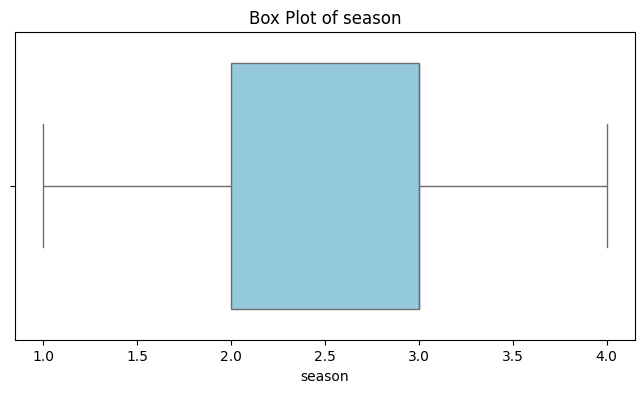

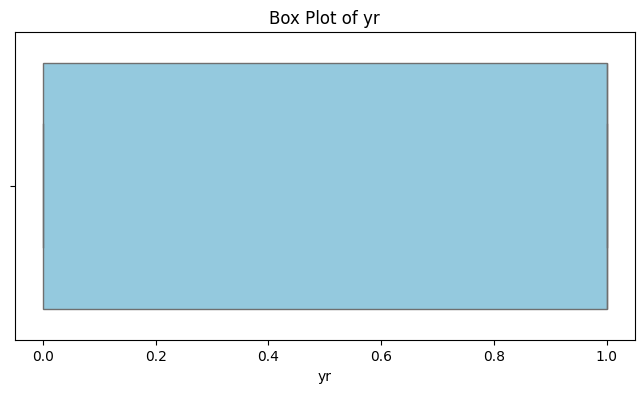

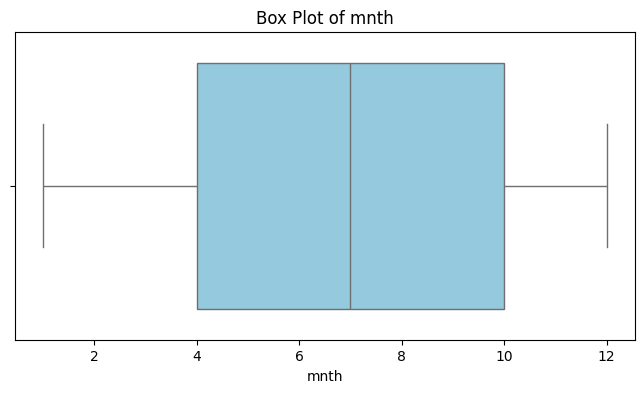

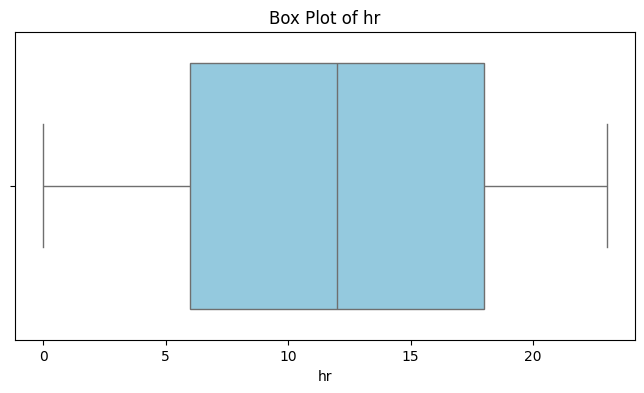

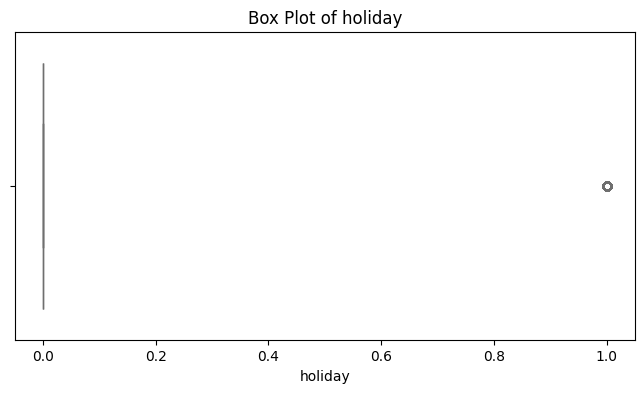

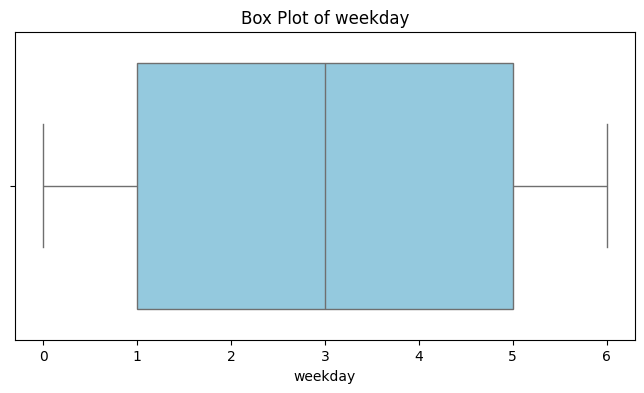

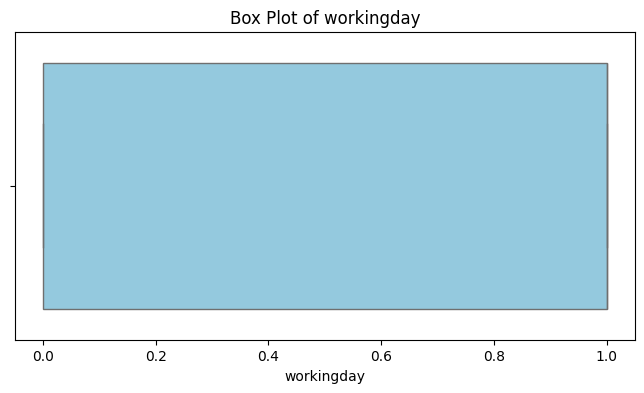

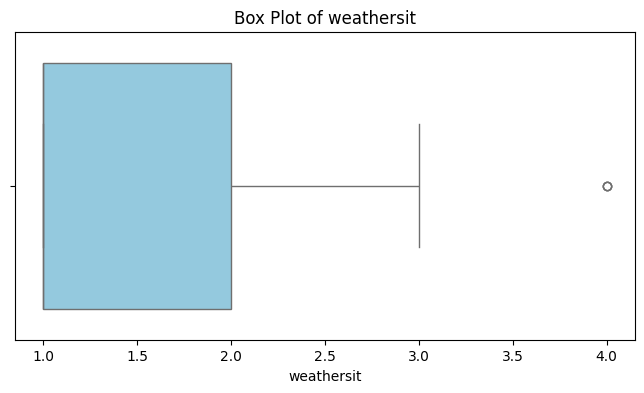

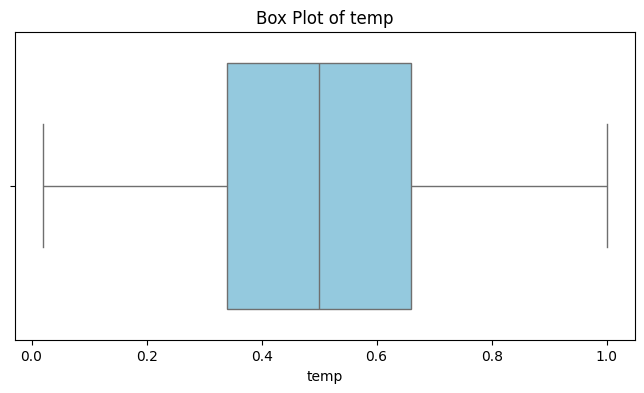

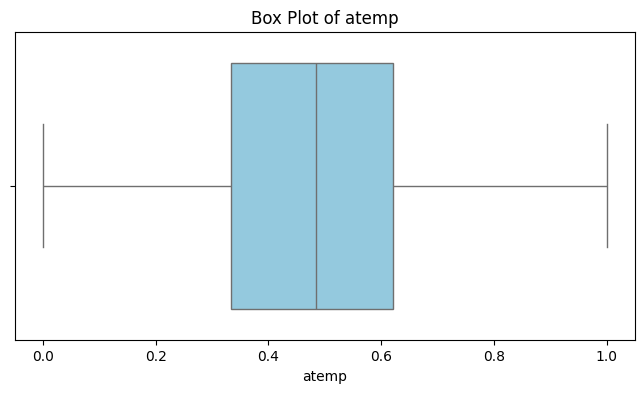

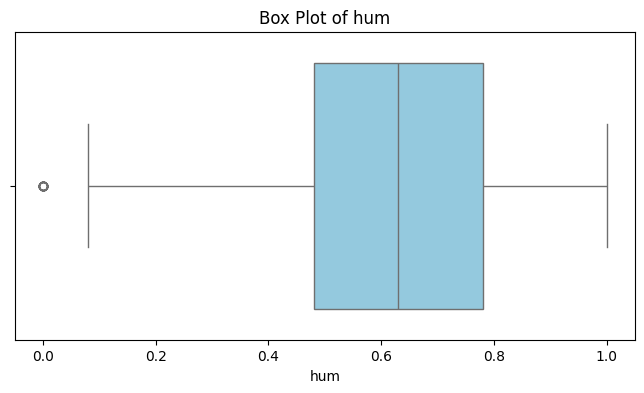

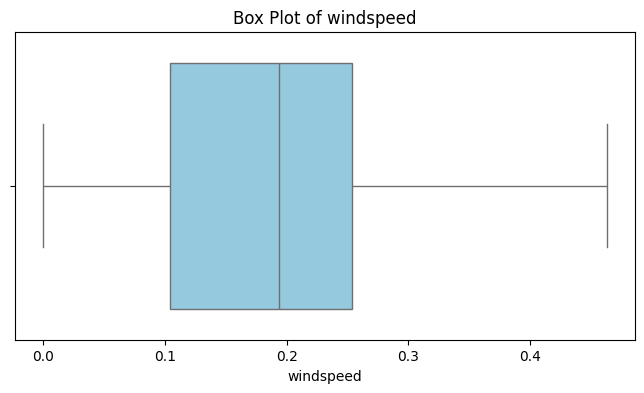

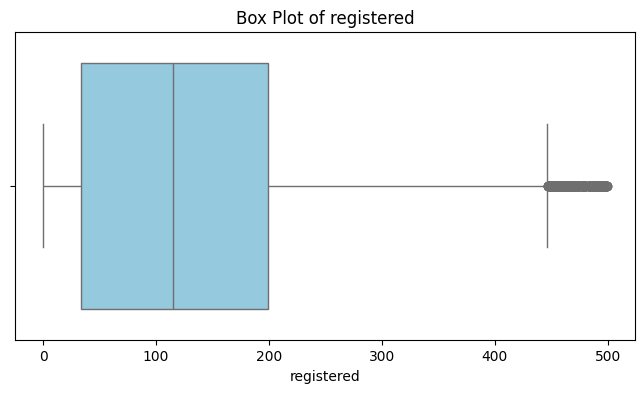

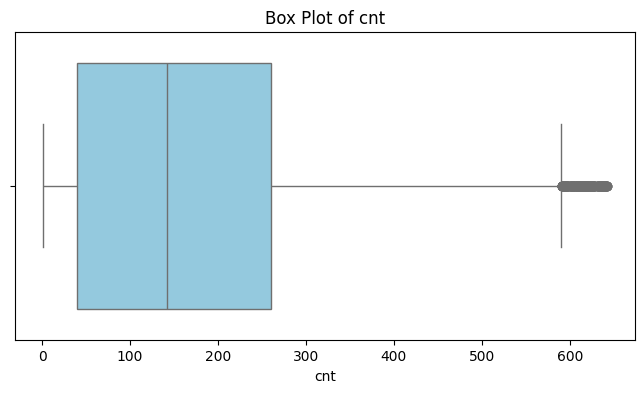

In [50]:
# Visualizing distributions
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

.





2. HANDLING OUTLIERS:-

We handled outliers to prevent them from distorting the model’s learning process. Outliers can skew the results, affect model accuracy, and make predictions less reliable. By handling outliers, we ensure that the model focuses on the general patterns in the data, improving its performance and robustness.



.

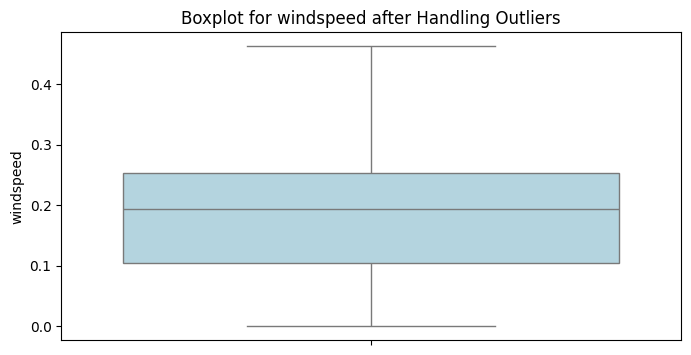

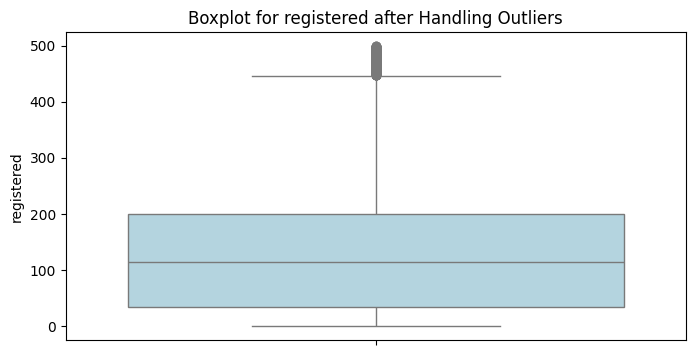

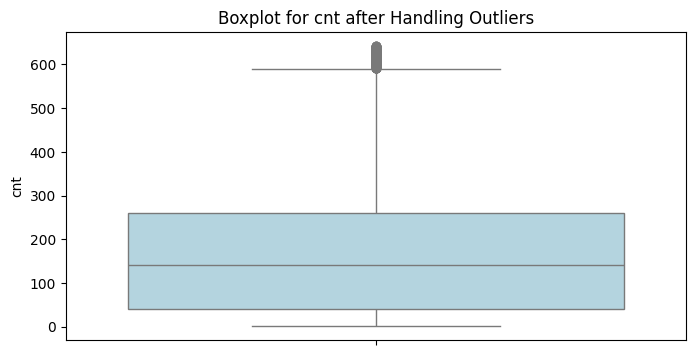

In [49]:
# List of continuous columns to process
continuous_columns = ['windspeed', 'registered', 'cnt']

# Function to handle outliers and plot boxplots
def handle_outliers_and_plot(df, column):
    # Calculate IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median
    median_value = df[column].median()
    df[column] = df[column].apply(
        lambda x: median_value if x < lower_bound or x > upper_bound else x
    )

    # Visualize updated boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column], color='lightblue')
    plt.title(f"Boxplot for {column} after Handling Outliers")
    plt.show()

# Loop through each continuous column, handle outliers and visualize
for column in continuous_columns:
    handle_outliers_and_plot(df, column)


.



CORELATION MATRIX :- 

A correlation matrix shows how features are related to each other. We used it to identify key predictors, avoid multicollinearity, and improve model performance.



.

In [51]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.127356 -0.010697 -0.120203  0.131741  0.006809  0.005772   
registered  0.1686

.



CORELATION MATRIX USING HEATMAP :

A correlation matrix shows how features are related to each other, and a heatmap visually represents this. We used it in the bike rental model to identify key relationships between features, focus on important ones, and avoid issues like multicollinearity.



.

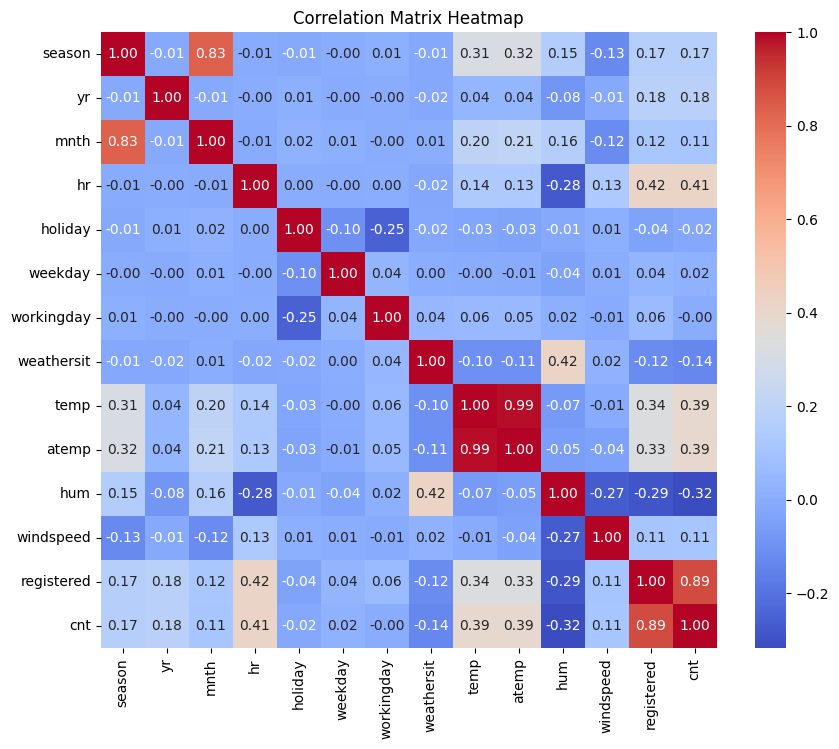

In [52]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


.


FEATURES SELECTION:- 

Feature selection is the process of identifying and selecting the most relevant features from the dataset that contribute the most to predicting the target variable. We did it to improve model accuracy, reduce unnecessary complexity, and avoid overfitting by removing irrelevant or redundant features. This helps the model learn better and faster, focusing only on the important data.


.

In [53]:
# Define target column
target_column = 'cnt'  # 'cnt' is the target variable (bike rentals)
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Apply feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 best features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['hr', 'temp', 'atemp', 'hum', 'registered'], dtype='object')


.


SPLIT INTO TRAINING AND TESTING DATA :-

In the bike rental dataset, we split the data so the model can learn patterns from the training data, and then we test it on the testing data to check how well it predicts bike rentals on new, unseen data. This helps avoid overfitting and ensures the model generalizes well.


.

In [54]:
# Define selected features and target variable
X_final = df[selected_features]  # Only use selected features
y = df['cnt']  # Target variable (Bike Rentals)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (13903, 5)
Testing set size: (3476, 5)


.

FEATURES SCALLING :- 

Feature scaling adjusts the range of features so they are on the same scale. This helps models treat all features equally, improving accuracy and performance.

.

In [55]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of X_train_scaled:\n", X_train_scaled[:5])
print("First 5 rows of X_test_scaled:\n", X_test_scaled[:5])


First 5 rows of X_train_scaled:
 [[-0.08060936 -1.54083688 -1.62031134 -0.3994488  -0.69120896]
 [ 0.93216926  0.1171121   0.13822833 -1.07374273  2.74724284]
 [-1.23807063 -0.19375333 -0.12584281  1.93464557 -1.13071032]
 [ 0.93216926 -0.19375333 -0.12584281 -1.64429913 -0.2861783 ]
 [-0.80402265 -1.54083688 -1.44445738  0.63792648 -1.14794566]]
First 5 rows of X_test_scaled:
 [[ 1.07685192  1.56781745  1.2815693  -1.85177419  0.91167835]
 [ 1.22153458 -1.33359326 -1.44445738 -1.1256115  -0.44129642]
 [-1.38275329 -0.91910601 -1.00511265  0.1711076  -1.13071032]
 [ 1.07685192  1.46419564  1.3692061  -0.55505509  2.78171354]
 [-1.67211861 -1.22997144 -1.44445738 -0.34758004 -1.08762195]]


.





TRAINING MODEL :-

Training the model means using historical data to teach the algorithm how to recognize patterns and relationships. In the bike rental dataset, we trained the model to predict the number of bike rentals based on features like weather, temperature, and other factors. This allows the model to make accurate predictions for future bike rental demand.

Random Forest is an algorithm that builds multiple decision trees and combines their results to make more accurate predictions. It improves accuracy, reduces overfitting, and works well with large datasets. It's used for both classification and regression tasks.


                                                                                                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                                                                                         .

In [ ]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

.





CALCULATE MEAN SQURE ERROR (MSE) :- 

MSE (Mean Squared Error) measures the average squared difference between actual and predicted values. We used it in our model to evaluate how accurately it predicts bike rentals, with lower MSE indicating better performance.




.


In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate MSE for the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


.


PREDICTION :- 

We made predictions by using the trained RandomForestRegressor model on the test data.




.

In [64]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Print the predicted values
print("Predicted values:", y_pred)

Predicted values: [368.9   93.45   3.67 ... 101.32 237.46 278.43]
